Лабораторная работа №1: Зависимости абсолютной погрешности от шага численного дифференцирования

Клименко Виталий, Б01-203

1. Для начала выпишем заданный список формул, присвоив каждой из них порядковый номер.

In [42]:
import math
import matplotlib.pyplot as plt

In [43]:
def f1(function, x, h):
    return (function(x + h) - function(x))/h

def f2(function, x, h):
    return (function(x) - function(x - h))/h

def f3(function, x, h):
    return (function(x + h) - function(x - h))/(2*h)

def f4(function, x, h):
    return 4*f3(function, x, h)/3 - (function(x + 2*h)-function(x - 2*h))/(3*4*h) #здесь f3 используется для краткости записи#

def f5(function, x, h):
    return 3*f3(function, x, h)/2 - 3*(function(x + 2*h)-function(x - 2*h))/(5*4*h) + (function(x + 3*h) - function(x - 3*h))/(10*6*h)

f = [f1, f2, f3, f4, f5]

2. Для краткости изложения определим функции, с которыми будем работать в дальнейшем, а также зафиксируем точку $x_0$, для которого будем считать производную:

In [44]:
def function1(x):
    return math.sin(x*x)

def function2(x):
    return math.cos(math.sin(x))

def function3(x):
    return math.exp(math.sin(math.cos(x)))

def function4(x):
    return math.log(x+3)

def function5(x):
    return (x+3)**(0.5)

x_0 = 3.3

3. Найдём аналитически производные заданных функций:

1) $\sin(x^2)'=2x\cos(x^2)$

2) $\cos(\sin x)'=-\cos x \sin(\sin x)$

3) $(e^{\sin(\cos x)})' = -\sin x \cos(\cos x)e^{\sin(\cos x)}$

4) $\ln(x+3)' = \frac{1}{x+3}$

5) $((x+3)^{0.5})' = \frac{1}{2\sqrt{(x+3)}}$

4. Создадим макет графика, который строит зависимость модуля абсолютной погрешности от шага в логарифмическом масштабе для наперёд заданной функции.

In [45]:
def create_graph(axes, name):
    h = [math.log(axes[0][i]) for i in range(len(axes[0]))]
    plt.figure()
    for i in range(1, 6):
        plt.plot(h, axes[i], label = f"$\ln(|f' - f'_{i}|)$")
    plt.xlabel("$\ln(h)$")
    plt.ylabel("$\ln(|f'-f'_i|)$")
    plt.title(f"Для функции {name}")
    plt.grid()
    plt.legend()

5. Далее будем исследовать каждую заданную функцию по отдельности, учитывая заранее посчитанные аналитически производные.

$\sin(x^2)$

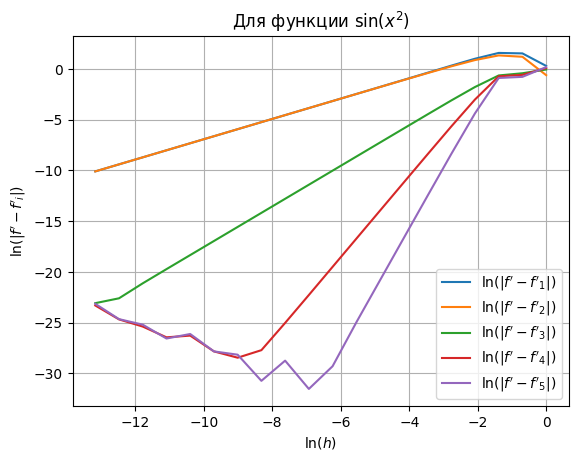

In [46]:
def function1_derivative(x):
    return (2*x*math.cos(x*x))

axes = [[] for _ in range(6)]

for n in range(1, 21):
    h = 2 / (2**n)
    axes[0].append(h)
    resultInPoint = function1_derivative(x_0)
    for i in range(0, 5):
        axes[i + 1].append(math.log(abs(f[i](function1, x_0, h) - resultInPoint)))

create_graph(axes, "$\sin(x^2)$")

$\cos(\sin x)$

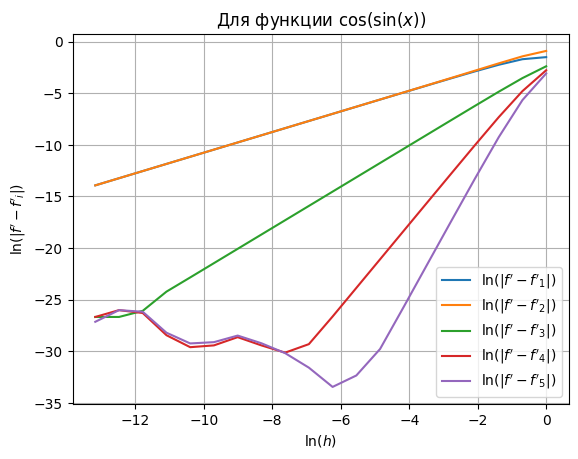

In [47]:
def function2_derivative(x):
    return (-math.cos(x)*math.sin(math.sin(x)))

axes = [[] for _ in range(6)]

for n in range(1, 21):
    h = 2 / (2**n)
    axes[0].append(h)
    resultInPoint = function2_derivative(x_0)
    for i in range(0, 5):
        axes[i + 1].append(math.log(abs(f[i](function2, x_0, h) - resultInPoint)))

create_graph(axes, "$\cos(\sin(x))$")

$e^{\sin(\cos x)}$

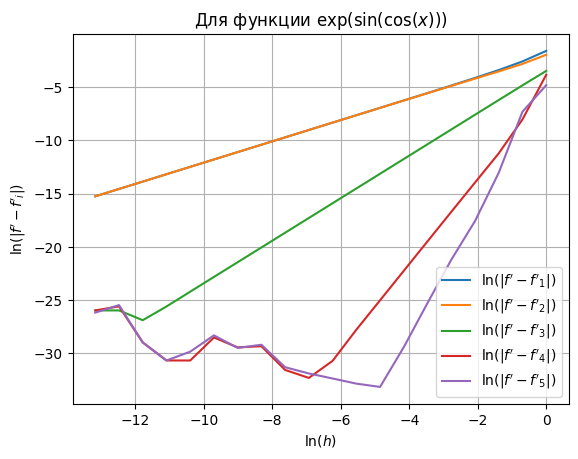

In [48]:
def function3_derivative(x):
    return (-math.sin(x) * math.cos(math.cos(x)) * math.exp(math.sin(math.cos(x))))

axes = [[] for _ in range(6)]

for n in range(1, 21):
    h = 2 / (2**n)
    axes[0].append(h)
    resultInPoint = function3_derivative(x_0)
    for i in range(0, 5):
        axes[i + 1].append(math.log(abs(f[i](function3, x_0, h) - resultInPoint)))

create_graph(axes, "$\exp(\sin(\cos(x)))$")

$\ln(x+3)$

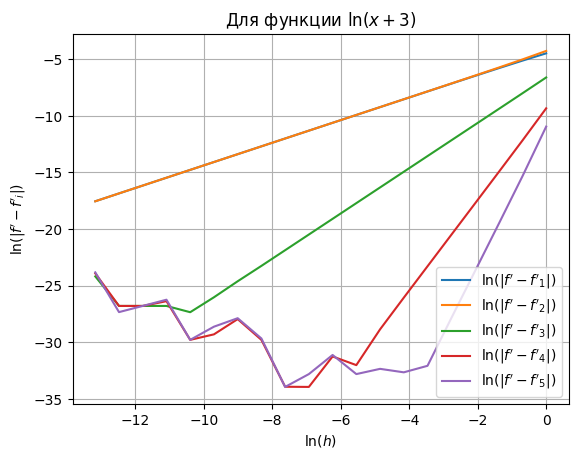

In [49]:
def function4_derivative(x):
    return (x+3)**(-1)

axes = [[] for _ in range(6)] 

for n in range(1, 21):
    h = 2 / (2**n)
    axes[0].append(h)
    resultInPoint = function4_derivative(x_0)
    for i in range(0, 5):
        axes[i + 1].append(math.log(abs(f[i](function4, x_0, h) - resultInPoint)))

create_graph(axes, "$\ln(x+3)$")

$(x+3)^{0.5}$

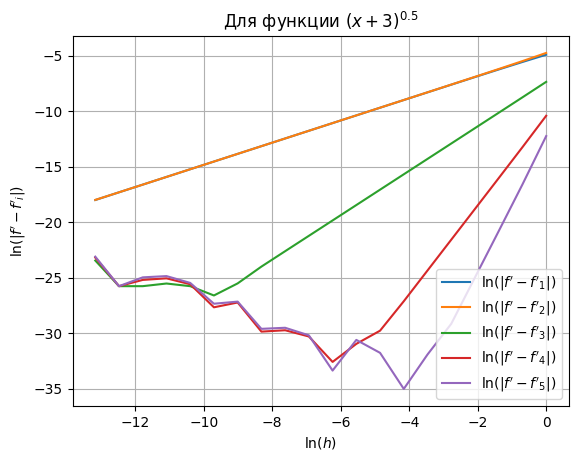

In [50]:
def function5_derivative(x):
    return (0.5 * (x + 3)**(-0.5))

axes = [[] for _ in range(6)]

for n in range(1, 21):
    h = 2 / (2**n)
    axes[0].append(h)
    resultInPoint = function5_derivative(x_0)
    for i in range(0, 5):
        axes[i + 1].append(math.log(abs(f[i](function5, x_0, h) - resultInPoint)))

create_graph(axes, "$(x+3)^{0.5}$")

Аналитика результатов:

Как и ожидалось, были получены прямые линии, которые отличаются углом наклона. При некоторых значениях h наблюдаются так называемые шумы, которые были теоретически предсказаны.